In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/Students Social Media Addiction.csv')

print(data.info())
print(data.head())

df = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [3]:
df.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Academic_Level,object
Country,object
Avg_Daily_Usage_Hours,float64
Most_Used_Platform,object
Affects_Academic_Performance,object
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64


In [4]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [5]:
df['Addicted'] = (df['Addicted_Score'] >= 7).astype(int)

df.drop(columns=['Student_ID', 'Addicted_Score'], inplace=True)

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
X = df.drop(columns=['Addicted'])
y = df['Addicted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
rf_model.score(X_train, y_train)

1.0

In [9]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9929078014184397
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.99      1.00      0.99        79

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



In [10]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Puntajes de validación cruzada (accuracy) para cada fold:", cv_scores)
print("Promedio de accuracy:", np.mean(cv_scores))
print("Desviación estándar:", np.std(cv_scores))

Puntajes de validación cruzada (accuracy) para cada fold: [1.         0.95035461 0.9787234  1.         0.9929078 ]
Promedio de accuracy: 0.9843971631205675
Desviación estándar: 0.018710504905351644


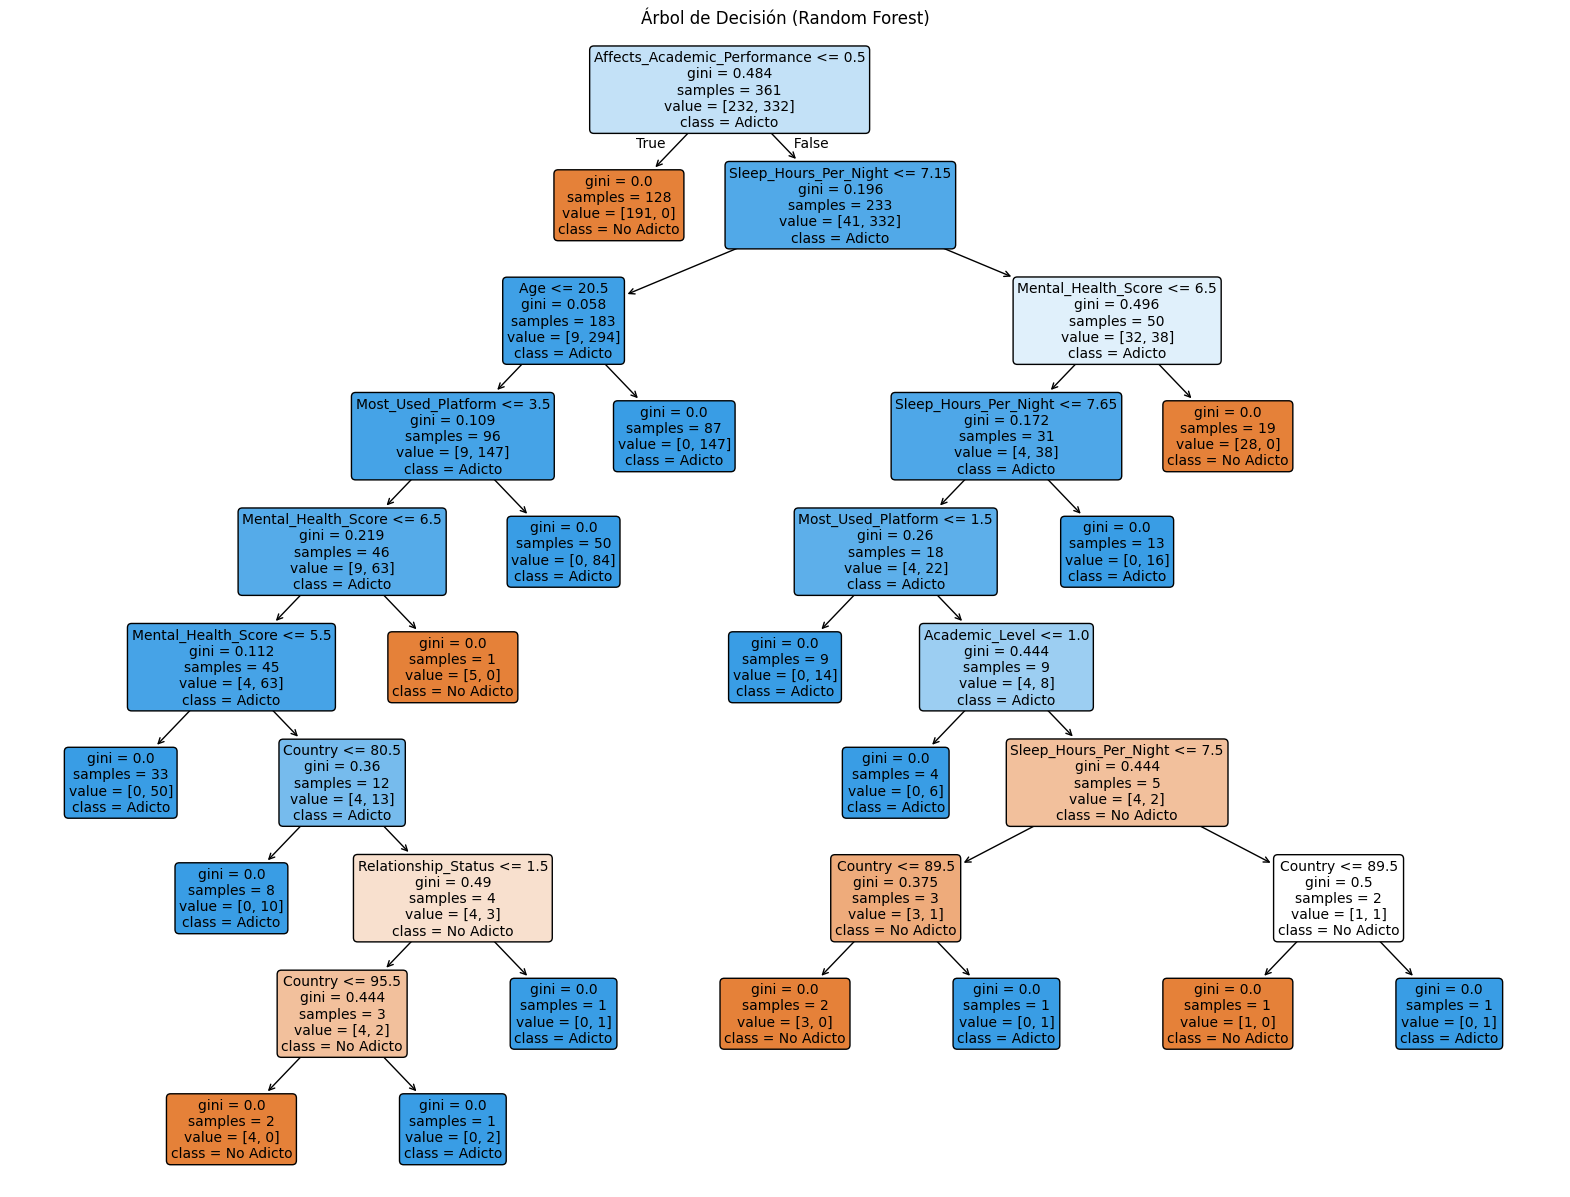

In [11]:
single_tree = rf_model.estimators_[0]

plt.figure(figsize=(20, 15))
plot_tree(
    single_tree,
    feature_names=X.columns,
    class_names=["No Adicto", "Adicto"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión (Random Forest)")
plt.show()

#0 = No afecta su vida academica
#1 = Si afecta su vida academica

# 0 <= 0.5 true
# 1 <= 0.5 false

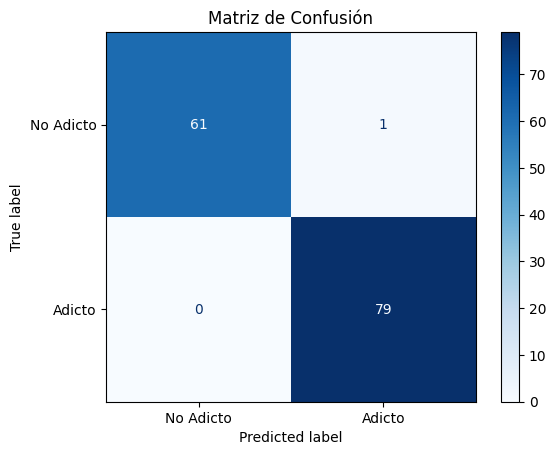

In [12]:
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Adicto", "Adicto"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

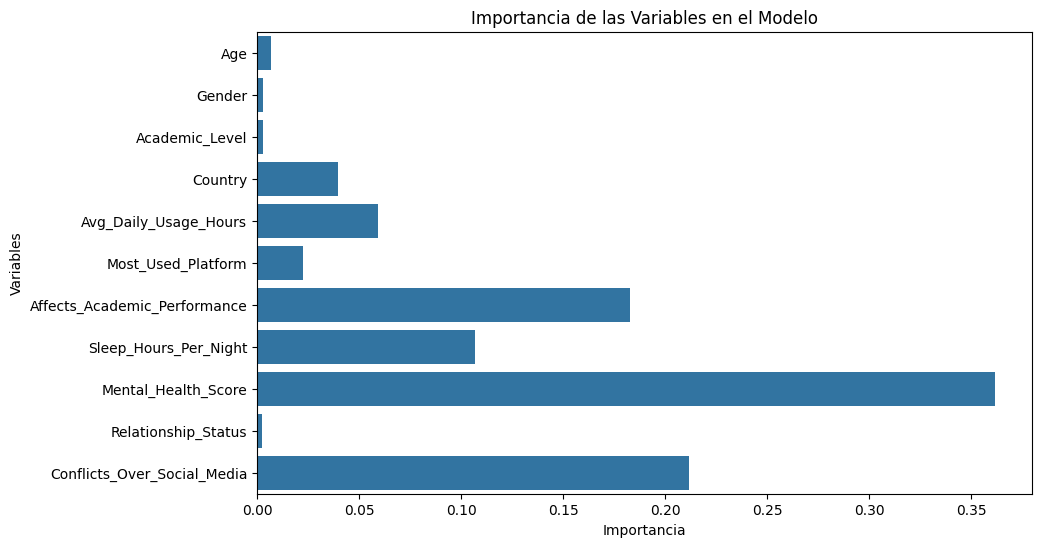

In [13]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Importancia de las Variables en el Modelo")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.show()

Correlación con la variable 'Addicted':
Addicted                        1.000000
Affects_Academic_Performance    0.874184
Conflicts_Over_Social_Media     0.787266
Avg_Daily_Usage_Hours           0.697224
Most_Used_Platform              0.257415
Country                         0.193511
Relationship_Status             0.070318
Gender                          0.018899
Academic_Level                 -0.003531
Age                            -0.102946
Sleep_Hours_Per_Night          -0.689385
Mental_Health_Score            -0.841819
Name: Addicted, dtype: float64


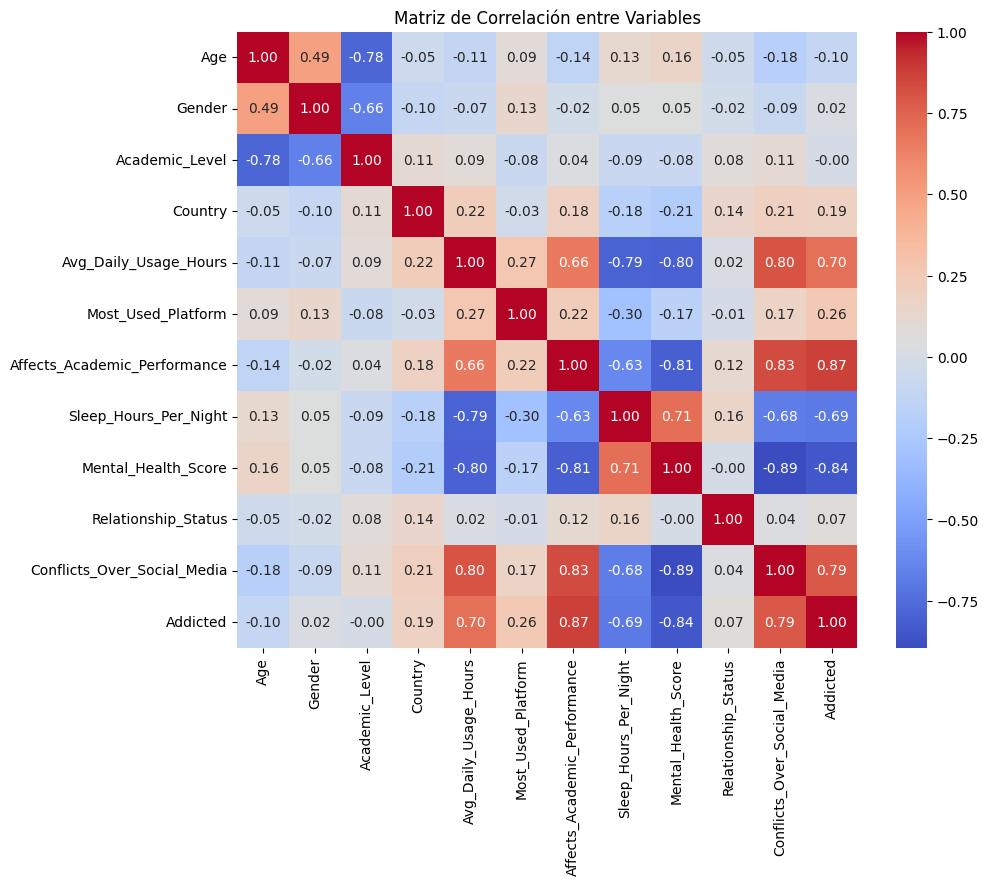

In [14]:
correlation_matrix = df.corr()

print("Correlación con la variable 'Addicted':")
print(correlation_matrix["Addicted"].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

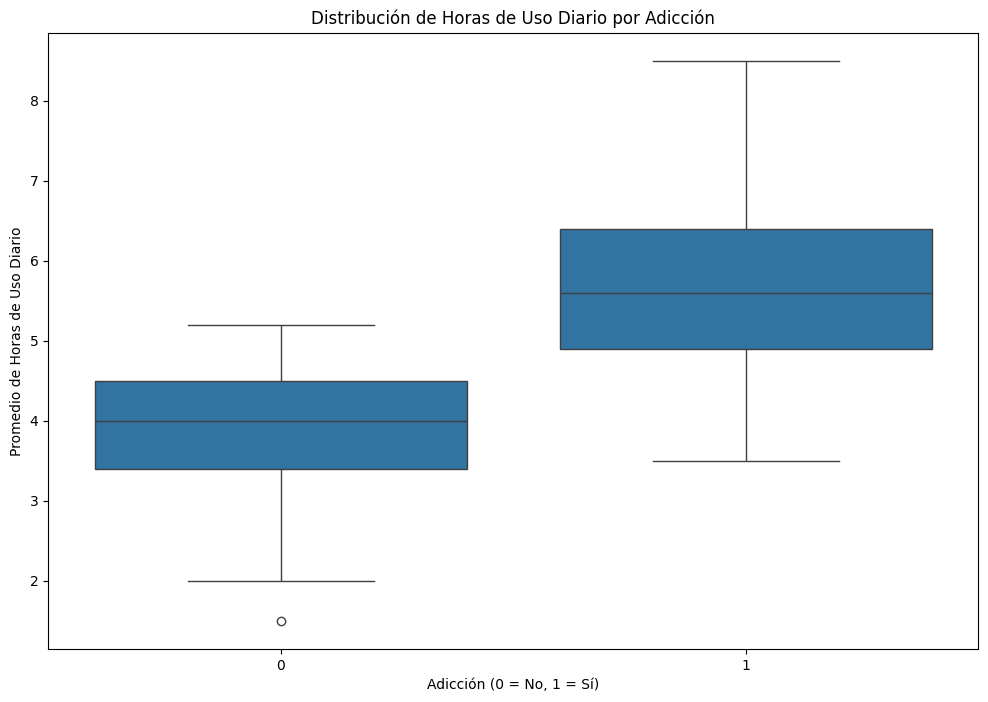

In [15]:
plt.figure(figsize=(12, 8))

sns.boxplot(x="Addicted", y="Avg_Daily_Usage_Hours", data=df)
plt.title("Distribución de Horas de Uso Diario por Adicción")
plt.xlabel("Adicción (0 = No, 1 = Sí)")
plt.ylabel("Promedio de Horas de Uso Diario")
plt.show()


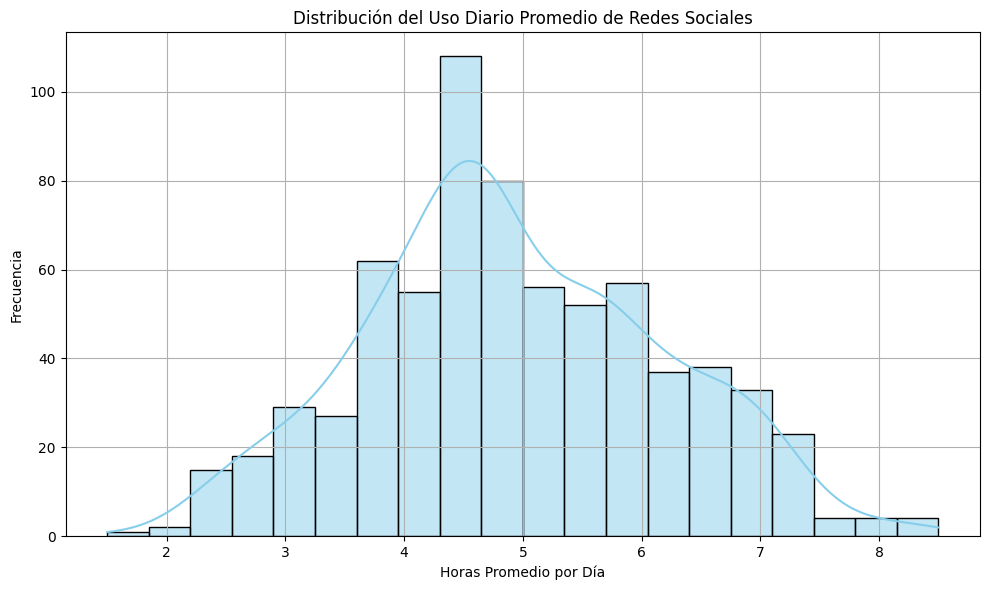

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Avg_Daily_Usage_Hours', kde=True, bins=20, color='skyblue')

plt.title('Distribución del Uso Diario Promedio de Redes Sociales')
plt.xlabel('Horas Promedio por Día')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Variable': features, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Variables más importantes para la clasificación:")
print(importance_df)


Variables más importantes para la clasificación:
                        Variable  Importancia
8            Mental_Health_Score     0.361819
10   Conflicts_Over_Social_Media     0.211669
6   Affects_Academic_Performance     0.182882
7          Sleep_Hours_Per_Night     0.107006
4          Avg_Daily_Usage_Hours     0.059250
3                        Country     0.039714
5             Most_Used_Platform     0.022451
0                            Age     0.006770
1                         Gender     0.002928
2                 Academic_Level     0.002872
9            Relationship_Status     0.002640


In [19]:
# Extraer las reglas como texto y convertirlas en lista de reglas
from sklearn.tree import _tree

def get_decision_paths(tree, feature_names, target_names=["No Adicto", "Adicto"]):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []

    def recurse(node, current_rule):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_rule = current_rule + [f"{name} <= {threshold:.2f}"]
            recurse(tree_.children_left[node], left_rule)

            right_rule = current_rule + [f"{name} > {threshold:.2f}"]
            recurse(tree_.children_right[node], right_rule)
        else:
            value = tree_.value[node][0]
            prediction = np.argmax(value)
            rule_text = " y ".join(current_rule)
            paths.append((rule_text, target_names[prediction]))

    recurse(0, [])
    return paths

# Aplicar función al primer árbol del Random Forest
rules = get_decision_paths(rf_model.estimators_[0], list(X.columns))

# Mostrar reglas que llevan a clasificar como "Adicto"
print("Reglas que predicen que el estudiante es ADICTO:")
for rule, prediction in rules:
    if prediction == "Adicto":
        print(f"Si {rule} ⇒ entonces es clasificado como Adicto")


Reglas que predicen que el estudiante es ADICTO:
Si Affects_Academic_Performance > 0.50 y Sleep_Hours_Per_Night <= 7.15 y Age <= 20.50 y Most_Used_Platform <= 3.50 y Mental_Health_Score <= 6.50 y Mental_Health_Score <= 5.50 ⇒ entonces es clasificado como Adicto
Si Affects_Academic_Performance > 0.50 y Sleep_Hours_Per_Night <= 7.15 y Age <= 20.50 y Most_Used_Platform <= 3.50 y Mental_Health_Score <= 6.50 y Mental_Health_Score > 5.50 y Country <= 80.50 ⇒ entonces es clasificado como Adicto
Si Affects_Academic_Performance > 0.50 y Sleep_Hours_Per_Night <= 7.15 y Age <= 20.50 y Most_Used_Platform <= 3.50 y Mental_Health_Score <= 6.50 y Mental_Health_Score > 5.50 y Country > 80.50 y Relationship_Status <= 1.50 y Country > 95.50 ⇒ entonces es clasificado como Adicto
Si Affects_Academic_Performance > 0.50 y Sleep_Hours_Per_Night <= 7.15 y Age <= 20.50 y Most_Used_Platform <= 3.50 y Mental_Health_Score <= 6.50 y Mental_Health_Score > 5.50 y Country > 80.50 y Relationship_Status > 1.50 ⇒ entonc

<ipython-input-20-442f15423c5f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=var_freq_df, x="Frecuencia", y="Variable", palette="viridis")


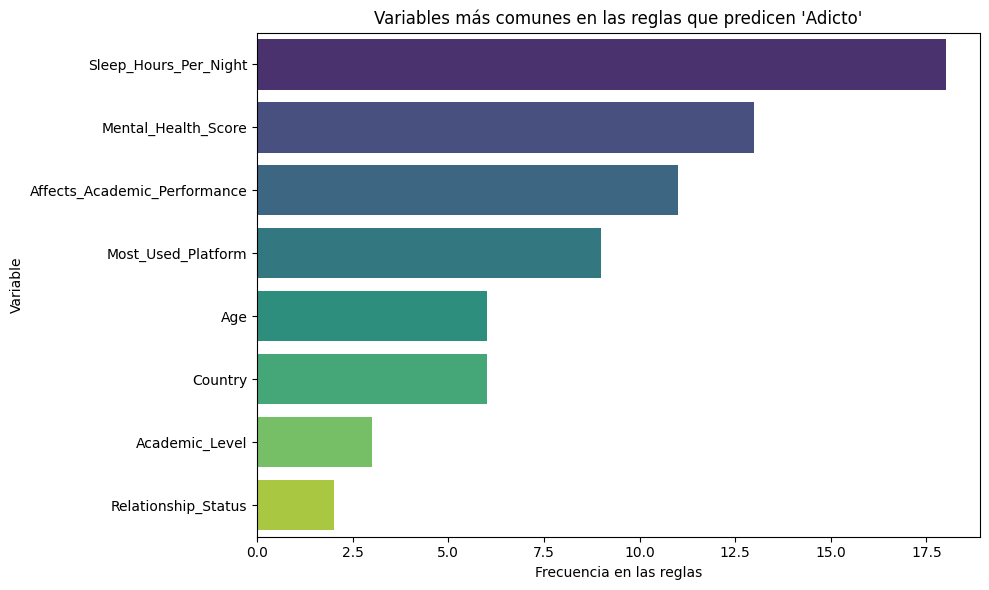

In [20]:
from collections import Counter
import seaborn as sns

var_counter = Counter()
for rule, prediction in rules:
    if prediction == "Adicto":
        for condition in rule.split(" y "):
            var = condition.split(" ")[0]
            var_counter[var] += 1

var_freq_df = pd.DataFrame(var_counter.items(), columns=["Variable", "Frecuencia"]).sort_values(by="Frecuencia", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=var_freq_df, x="Frecuencia", y="Variable", palette="viridis")
plt.title("Variables más comunes en las reglas que predicen 'Adicto'")
plt.xlabel("Frecuencia en las reglas")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [21]:
df.shape

(705, 12)